In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, InputLayer
from tensorflow.keras import regularizers
#from tensorflow.keras.regularizers import l2
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [44]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

train = pd.read_csv('train.csv', header=None, names=['class', 'title', 'text'])
news = train['text']
y_train = utils.to_categorical(train['class'] - 1, nb_classes)

In [45]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(news)
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

In [46]:
sequences = tokenizer.texts_to_sequences(news)
N = len(sequences)
List = list()
for i in range(N):
    List.append([sequences[i], y_train[i]])
#sequences2 = sorted(sequences, key=lambda seq: len(seq))
List2 = sorted(List, key=lambda data: len(data[0]))
sequences2 = list()
y_train2 = np.ndarray(shape = y_train.shape, dtype = np.float32())
for i in range(N):
    sequences2.append(List2[i][0])
    y_train2[i] = np.float32(List2[i][1])
    #print(List2[i][1],y_train2[i],i)

In [47]:
x_train = pad_sequences(sequences, maxlen=max_news_len, padding = 'post')
x_train2 = pad_sequences(sequences2, maxlen=max_news_len, padding = 'post')
#x_train = pad_sequences(sequences, maxlen=max_news_len)
#x_train2 = pad_sequences(sequences2, maxlen=max_news_len)

In [48]:
l2_lambda = 0.0001
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(Dropout(0.9))
model_lstm.add(LSTM(16, dropout=0.5, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(l2_lambda)))
#model_lstm.add(Dropout(0.9))
model_lstm.add(Dense(4, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.summary()
#print(x_train[1])
#print(y_train[1])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 68        
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_lstm = model_lstm.fit(x_train2, y_train2, epochs=50, batch_size=1536, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Train on 108000 samples, validate on 12000 samples
Epoch 1/50
108000/108000 [==============================] - 19s 173us/sample - loss: 1.3594 - accuracy: 0.3302 - val_loss: 1.1126 - val_accuracy: 0.5033
Epoch 2/50
108000/108000 [==============================] - 10s 93us/sample - loss: 1.0726 - accuracy: 0.5172 - val_loss: 0.8210 - val_accuracy: 0.6224
Epoch 3/50
108000/108000 [==============================] - 10s 92us/sample - loss: 0.8743 - accuracy: 0.6145 - val_loss: 0.7098 - val_accuracy: 0.6823
Epoch 4/50
108000/108000 [==============================] - 10s 94us/sample - loss: 0.7700 - accuracy: 0.6635 - val_loss: 0.6694 - val_accuracy: 0.7583
Epoch 5/50
108000/108000 [==============================] - 10s 94us/sample - loss: 0.7155 - accuracy: 0.6949 - val_loss: 0.6268 - val_accuracy: 0.7962
Epoch 6/50
108000/108000 [==============================] - 10s 94us/sample - loss: 0.6697 - accuracy: 0.7288 - val_loss: 0.5691 - val_accuracy: 0.8317
Epoch 7/50
108000/108000 [==========

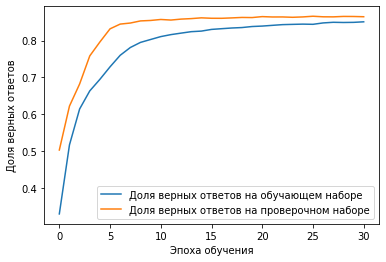

In [50]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [51]:
model_lstm.save('LSTM.h5')
test = pd.read_csv('test.csv', header=None, names=['class', 'title', 'text'])
test_sequences = tokenizer.texts_to_sequences(test['text'])
x_test = pad_sequences(test_sequences, maxlen=max_news_len, padding = 'post')
y_test = utils.to_categorical(test['class'] - 1, nb_classes)
res = model_lstm.evaluate(x_test, y_test, verbose=0)
print('val_loss:',res[0],'\nval_accuracy:',res[1])

val_loss: 0.32516818248911905 
val_accuracy: 0.8975


In [2]:
# Задание 2
names = str(list(range(26)))
print(names)
train_data = pd.read_csv('./CMAPSSData/train_FD.txt', sep = ' ', header=None)
train_data

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,NaN,NaN
160355,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,NaN,NaN
160356,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,NaN,NaN
160357,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,NaN,NaN


In [3]:
mas = [4, 5, 9, 10, 14, 20, 22, 23, 26, 27]
train_data2 = train_data.drop(train_data.columns[mas], axis=1)
train_data2.columns = range(18)
train_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,249,251,9.9998,0.2500,605.33,1516.36,1315.28,404.59,2319.66,8840.16,46.08,380.16,2388.73,8185.69,8.4541,372,29.11,17.5234
160355,249,252,0.0028,0.0015,643.42,1598.92,1426.77,567.59,2388.47,9117.12,48.04,535.02,2388.46,8185.47,8.2221,396,39.38,23.7151
160356,249,253,0.0029,0.0000,643.68,1607.72,1430.56,569.04,2388.51,9126.53,48.24,535.41,2388.48,8193.94,8.2525,395,39.78,23.8270
160357,249,254,35.0046,0.8400,555.77,1381.29,1148.18,199.93,2223.78,8403.64,42.53,187.92,2388.83,8125.64,9.0515,337,15.26,9.0774


In [17]:
i = train_data2.shape[0] - 2
temp_time = train_data2[1][i + 1]
count = 1
max_count = 1
while (i != -1):
    count += 1
    if (train_data2[0][i] == train_data2[0][i + 1]):
        train_data2[1][i] = temp_time
    else:
        temp_time = train_data2[1][i]
        if (count > max_count):
            max_count = count
            count = 1
    i -= 1
train_data2

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,-0.701701,-1.041427,-1.111321,1.046626,1.037990,1.024534,1.117707,0.802032,0.983932,0.950816,1.113752,0.345199,0.616065,-0.844470,1.009021,1.121958,1.119482
1,1,-0.701701,-1.041270,-1.111050,1.054394,1.055929,1.043169,1.114204,0.801891,0.978273,0.956653,1.117528,0.345649,0.527629,-0.828118,1.009021,1.116826,1.120138
2,1,-0.701701,-1.041645,-1.109426,1.059103,1.023520,1.050946,1.117133,0.802172,1.001948,0.892447,1.118380,0.345289,0.549211,-0.846729,0.944549,1.112549,1.108820
3,1,-0.701701,-1.041342,-1.110238,1.059103,0.979517,1.033851,1.118224,0.802383,0.992713,0.851589,1.121060,0.345739,0.556653,-0.912666,1.009021,1.106562,1.113053
4,1,-0.701701,-1.041500,-1.110779,1.059573,0.980025,1.065766,1.115640,0.802032,1.007847,0.895366,1.116979,0.345379,0.556281,-0.831309,1.041257,1.108273,1.117401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,249,0.122096,-0.436362,-0.433270,0.187601,0.417384,0.398560,0.257619,0.321783,0.434015,0.545152,0.251961,0.351586,1.199893,-0.798474,0.364304,0.270907,0.279069
160355,249,0.122096,-1.041215,-1.106176,1.084292,1.116010,1.216537,1.193683,0.804910,1.173252,1.117168,1.195119,0.349158,1.197165,-1.106885,1.137965,1.149328,1.161691
160356,249,0.122096,-1.041209,-1.110238,1.090413,1.190476,1.244343,1.202010,0.805191,1.198369,1.175537,1.197494,0.349337,1.302222,-1.066472,1.105729,1.183542,1.177643
160357,249,0.122096,1.076516,1.164376,-0.979110,-0.725583,-0.827415,-0.917688,-0.351408,-0.731107,-0.490898,-0.918857,0.352486,0.455069,-0.004316,-0.763951,-0.913721,-0.924903


In [31]:
np.sqrt(4)

2.0

In [11]:
eps = 0.001
for i in range(1,train_data2.shape[1]):
    m = np.mean(train_data2[i])
    v = np.var(train_data2[i])
    train_data2[i] = (train_data2[i] - m)/np.sqrt(v + eps)
train_data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,-0.701701,-1.041427,-1.111321,1.046626,1.037990,1.024534,1.117707,0.802032,0.983932,0.950816,1.113752,0.345199,0.616065,-0.844470,1.009021,1.121958,1.119482
1,1,-0.701701,-1.041270,-1.111050,1.054394,1.055929,1.043169,1.114204,0.801891,0.978273,0.956653,1.117528,0.345649,0.527629,-0.828118,1.009021,1.116826,1.120138
2,1,-0.701701,-1.041645,-1.109426,1.059103,1.023520,1.050946,1.117133,0.802172,1.001948,0.892447,1.118380,0.345289,0.549211,-0.846729,0.944549,1.112549,1.108820
3,1,-0.701701,-1.041342,-1.110238,1.059103,0.979517,1.033851,1.118224,0.802383,0.992713,0.851589,1.121060,0.345739,0.556653,-0.912666,1.009021,1.106562,1.113053
4,1,-0.701701,-1.041500,-1.110779,1.059573,0.980025,1.065766,1.115640,0.802032,1.007847,0.895366,1.116979,0.345379,0.556281,-0.831309,1.041257,1.108273,1.117401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,249,0.122096,-0.436362,-0.433270,0.187601,0.417384,0.398560,0.257619,0.321783,0.434015,0.545152,0.251961,0.351586,1.199893,-0.798474,0.364304,0.270907,0.279069
160355,249,0.122096,-1.041215,-1.106176,1.084292,1.116010,1.216537,1.193683,0.804910,1.173252,1.117168,1.195119,0.349158,1.197165,-1.106885,1.137965,1.149328,1.161691
160356,249,0.122096,-1.041209,-1.110238,1.090413,1.190476,1.244343,1.202010,0.805191,1.198369,1.175537,1.197494,0.349337,1.302222,-1.066472,1.105729,1.183542,1.177643
160357,249,0.122096,1.076516,1.164376,-0.979110,-0.725583,-0.827415,-0.917688,-0.351408,-0.731107,-0.490898,-0.918857,0.352486,0.455069,-0.004316,-0.763951,-0.913721,-0.924903


In [76]:
temp_data = train_data2.loc[:,2:]
x_train = np.array(temp_data, dtype = np.float32())
temp_data = train_data2.loc[:,1]
y_train = np.array(temp_data, dtype = np.float32())

In [13]:
x_train

array([[-1.0414271 , -1.1113211 ,  1.0466256 , ...,  1.0090212 ,
         1.121958  ,  1.1194824 ],
       [-1.0412698 , -1.1110502 ,  1.0543942 , ...,  1.0090212 ,
         1.116826  ,  1.1201382 ],
       [-1.0416449 , -1.1094255 ,  1.0591025 , ...,  0.94454944,
         1.1125494 ,  1.1088197 ],
       ...,
       [-1.0412093 , -1.1102378 ,  1.0904126 , ...,  1.1057287 ,
         1.1835415 ,  1.1776426 ],
       [ 1.0765164 ,  1.1643755 , -0.97911   , ..., -0.7639513 ,
        -0.91372144, -0.92490274],
       [ 1.4999441 ,  1.1643755 , -1.118475  , ..., -0.89289474,
        -1.3071721 , -1.3017033 ]], dtype=float32)

In [77]:
handle = open('./CMAPSSData/RUL_FD.txt', "r")
a = list()
for line in handle:
    a.append(np.float32(line))
handle.close()
y_test = np.array(a)
y_test

test_data = pd.read_csv('./CMAPSSData/test_FD.txt', sep = ' ', header=None)
mas = [4, 5, 9, 10, 14, 20, 22, 23, 26, 27]
test_data2 = test_data.drop(test_data.columns[mas], axis=1)
test_data2.columns = range(18)

i = 1
j = 0
test_data2[1][0] = y_test[j]

while (i != test_data2.shape[0]):
    if (test_data2[0][i] == test_data2[0][i - 1]):
        test_data2[1][i] = y_test[j]
    else:
        j += 1
        test_data2[1][i] = y_test[j]
    i += 1


eps = 0.001
for i in range(1,test_data2.shape[1]):
    m = np.mean(test_data2[i])
    v = np.var(test_data2[i])
    test_data2[i] = (test_data2[i] - m)/np.sqrt(v + eps)

eps = 0.001
m = np.mean(y_test)
v = np.var(y_test)
y_test = (y_test - m)/np.sqrt(v + eps)

temp_data = test_data2.loc[:,2:]
x_test = np.array(temp_data, dtype = np.float32())
temp_data = test_data2.loc[:,1]
y_test = np.array(temp_data, dtype = np.float32())

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [129]:
l2_lambda = 0.0001
model_lstm2 = Sequential()
#model_lstm2.add(Embedding(x_train.shape[0], 16, input_length=16))
model_lstm2.add(InputLayer(input_shape=[x_train.shape[1], 1]))
x_train2 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1], 1])
y_train2 = np.reshape(y_train, [y_train.shape[0], 1])
x_test2 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1], 1])
y_test2 = np.reshape(y_test, [y_test.shape[0], 1])
model_lstm2.add(LSTM(200, kernel_regularizer=regularizers.l2(l2_lambda)))
#model_lstm2.add(LSTM(50, dropout=0.5, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(l2_lambda), return_sequences=True))
#model_lstm2.add(LSTM(20, dropout=0.5, recurrent_dropout=0.2, kernel_regularizer=regularizers.l2(l2_lambda)))
#model_lstm.add(Dropout(0.9))
model_lstm2.add(Dropout(0.3))
model_lstm2.add(Dense(50, activation='tanh'))
model_lstm2.add(Dropout(0.5))
#model_lstm2.add(Dense(5, activation='tanh'))
#model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(1, activation='relu'))
model_lstm2.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model_lstm2.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 200)               161600    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 51        
Total params: 171,701
Trainable params: 171,701
Non-trainable params: 0
_________________________________________________________________


In [131]:
history_lstm2 = model_lstm2.fit(x_train2, y_train2, epochs=50, batch_size=20, validation_data = (x_test2, y_test2))

Train on 160359 samples, validate on 104897 samples
Epoch 1/50
160359/160359 [==============================] - 286s 2ms/sample - loss: 1.0001 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
160359/160359 [==============================] - 235s 1ms/sample - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
160359/160359 [==============================] - 253s 2ms/sample - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
 32800/160359 [=====>........................] - ETA: 2:50 - loss: 1.0101 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [128]:
x_test2
y_test.shape

(104897,)

In [60]:
x_test2 = np.reshape(x_test2, [1, x_test2.shape[0], x_test2.shape[1]])
x_test2

ValueError: cannot reshape array of size 1678352 into shape (1,1,104897)

In [61]:
x_test2

array([[[-1.0430378 , -1.1113998 ,  1.0809845 , ...,  1.0316682 ,
          1.1033361 ,  1.1114497 ],
        [-1.0433402 , -1.1130239 ,  1.0501105 , ...,  1.0639969 ,
          1.1170101 ,  1.1140277 ],
        [-1.0431588 , -1.1119412 ,  1.0677865 , ...,  1.0639969 ,
          1.1221379 ,  1.1175888 ],
        ...,
        [ 1.0741011 ,  1.1650683 , -0.97178715, ..., -0.7787352 ,
         -0.9622999 , -0.9588211 ],
        [ 0.16690108,  0.7825892 ,  0.2601115 , ...,  0.19112377,
         -0.12903756, -0.12559074],
        [ 1.0746274 ,  1.1620908 , -0.9604745 , ..., -0.8110638 ,
         -0.959736  , -0.95721155]]], dtype=float32)

In [5]:
a = np.ones([3,3])
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
a.reshape(5,5)

ValueError: cannot reshape array of size 9 into shape (5,5)